# **08. 순환 신경망(Recurrent Neural Network)**
앞서 배운 피드 포워드 신경망은 입력의 길이가 고정되어 있어 자연어 처리를 위한 신경망으로는 한계가 있었습니다. 결국 다양한 길이의 입력 시퀀스를 처리할 수 있는 인공 신경망이 필요하게 되었는데, 자연어 처리에 대표적으로 사용되는 인공 신경망이 바로 순환 신경망(Recurrent Neural Network, RNN)입니다. 이번 챕터에서는 가장 기본적인 순환 신경망인 바닐라 RNN, 이를 개선한 LSTM, GRU에 대해서 학습해봅시다. LSTM과 GRU를 이해한다면 텍스트 분류나 기계 번역과 같은 다양한 자연어 처리 문제들을 풀 수 있습니다.

## **08-01 순환 신경망(Recurrent Neural Network, RNN)**

---
RNN(Recurrent Neural Network)은 입력과 출력을 시퀀스 단위로 처리하는 시퀀스(Sequence) 모델입니다. 번역기를 생각해보면 입력은 번역하고자 하는 단어의 시퀀스인 문장입니다. 출력에 해당되는 번역된 문장 또한 단어의 시퀀스입니다. 이와 같이 시퀀스들을 처리하기 위해 고안된 모델들을 시퀀스 모델이라고 합니다. 그 중 RNN은 가장 기본적인 인공 신경망 시퀀스 모델입니다.

뒤에서 배우는 LSTM이나 GRU 또한 근본적으로 RNN에 속합니다. RNN을 이해하고 'RNN을 이용한 텍스트 분류' 챕터, '태깅 작업' 챕터, 'RNN을 이용한 인코더-디코더' 챕터에서 실습을 진행합니다.  

```
용어는 비슷하지만 순환 신경망과 재귀 신경망(Recursive Neural Network)은 전혀 다른 개념입니다.
```

---
### **1. 순환 신경망(Recurrent Neural Network, RNN)**

앞서 배운 신경망들은 전부 은닉층에서 활성화 함수를 지난 값은 오직 출력층 방향으로만 향했습니다. 이와 같은 신경망들을 피드 포워드 신경망(Feed Forward Neural Network)이라고 합니다. 그런데 그렇지 않은 신경망들이 있습니다. RNN(Recurrent Neural Network) 또한 그 중 하나입니다. RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고있습니다.  
  
  ![image.png](https://wikidocs.net/images/page/22886/rnn_image1_ver2.PNG)


위의 그림을 보겠습니다. $x$는 입력층의 입력 벡터, $y$는 출력층의 출력 벡터입니다. 실제로는 편향 $b$도 입력으로 존재할 수 있지만 앞으로의 그림에서는 생략합니다. RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라고 합니다. 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 **메모리 셀** 또는 **RNN 셀**이라고 표현합니다.

은닉층의 메모리 셀은 각각의 시점(time step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 하고 있습니다. 앞으로는 현재 시점을 변수 t로 표현하겠습니다. 이는 현재 시점 t에서의 메모리 셀이 갖고있는 값은 과거의 메모리 셀들의 값에 영향을 받은 것임을 의미합니다. 그렇다면 메모리 셀이 갖고 있는 이 값은 뭐라고 부를까요?

메모리 셀이 출력층 방향 또는 다음 시점인 t+1의 자신에게 보내는 값을 **은닉 상태(hidden state)** 라고 합니다. 다시 말해 t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용합니다.  
  
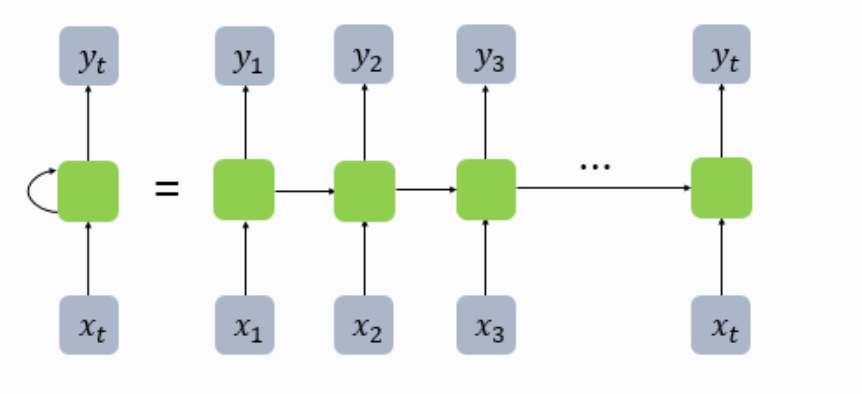

RNN을 표현할 때는 일반적으로 위의 그림에서 좌측과 같이 화살표로 사이클을 그려서 재귀 형태로 표현하기도 하지만, 우측과 같이 사이클을 그리는 화살표 대신 여러 시점으로 펼쳐서 표현하기도 합니다. 두 그림은 동일한 그림으로 단지 사이클을 그리는 화살표를 사용하여 표현하였느냐, 시점의 흐름에 따라서 표현하였느냐의 차이일 뿐 둘 다 동일한 RNN을 표현하고 있습니다.

피드 포워드 신경망에서는 뉴런이라는 단위를 사용했지만, RNN에서는 뉴런이라는 단위보다는 입력층과 출력층에서는 각각 입력 벡터와 출력 벡터, 은닉층에서는 **은닉 상태 (Hidden State)** 라는 표현을 주로 사용합니다. 위의 그림에서 회색과 초록색으로 표현한 각 네모들은 기본적으로 벡터 단위를 가정하고 있습니다. 피드 포워드 신경망과의 차이를 비교하기 위해서 RNN을 뉴런 단위로 시각화해보겠습니다.  
  
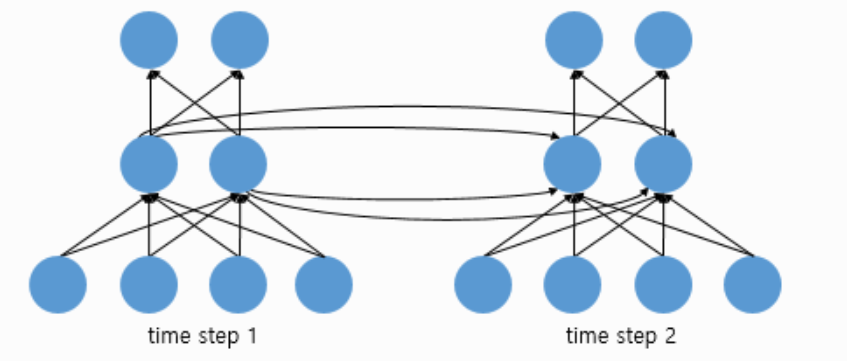

위의 그림은 입력 벡터의 차원이 4, 은닉 상태의 크기가 2, 출력층의 출력 벡터의 차원이 2인 RNN이 시점이 2일 때의 모습을 보여줍니다. 다시 말해 뉴런 단위로 해석하면 입력층의 뉴런 수는 4, 은닉층의 뉴런 수는 2, 출력층의 뉴런 수는 2입니다.  
  
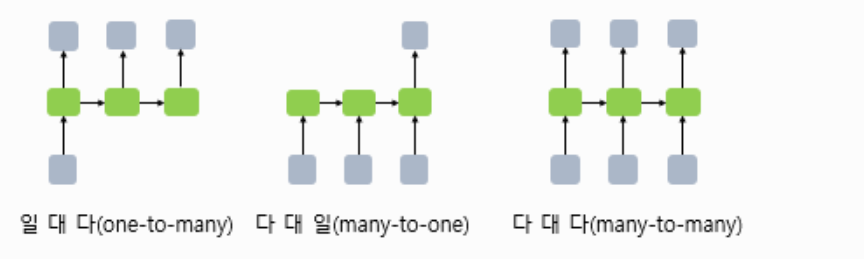

RNN은 입력과 출력의 길이를 다르게 설계 할 수 있으므로 다양한 용도로 사용할 수 있습니다. 위 그림은 입력과 출력의 길이에 따라서 달라지는 RNN의 다양한 형태를 보여줍니다. 위 구조가 자연어 처리에서 어떻게 사용될 수 있는지 예를 들어봅시다. RNN 셀의 각 시점의 입, 출력의 단위는 사용자가 정의하기 나름이지만 가장 보편적인 단위는 '단어 벡터'입니다.

예를 들어 하나의 입력에 대해서 여러개의 출력을 의미하는 **일 대 다(one-to-many) 구조** 의 모델은 하나의 이미지 입력에 대해서 사진의 제목을 출력하는 이미지 캡셔닝(Image Captioning) 작업에 사용할 수 있습니다. 사진의 제목은 단어들의 나열이므로 시퀀스 출력입니다.  
  
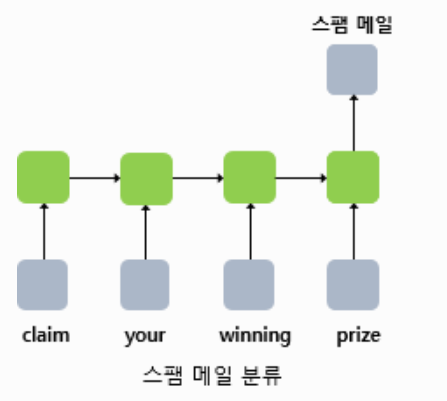

또한 단어 시퀀스에 대해서 하나의 출력을 하는 **다 대 일(many-to-one) 구조** 의 모델은 입력 문서가 긍정적인지 부정적인지를 판별하는 감성 분류(sentiment classification), 또는 메일이 정상 메일인지 스팸 메일인지 판별하는 스팸 메일 분류(spam detection) 등에 사용할 수 있습니다. 위 그림은 RNN으로 스팸 메일을 분류할 때의 아키텍처를 보여줍니다. 이러한 예제들은 'RNN을 이용한 텍스트 분류' 챕터에서 배웁니다.    
  
    
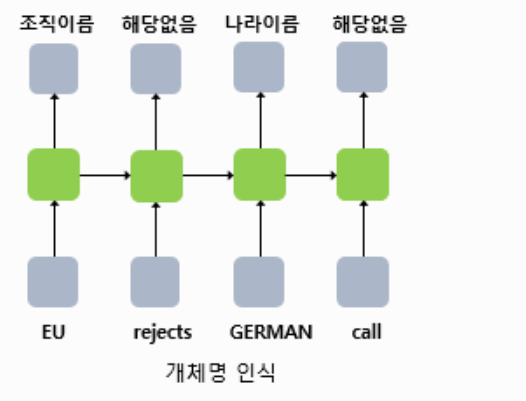

**다 대 다(many-to-many)** 구조의 모델의 경우에는 사용자가 문장을 입력하면 대답 문장을 출력하는 챗봇과 입력 문장으로부터 번역된 문장을 출력하는 번역기, 또는 '태깅 작업' 챕터에서 배우는 개체명 인식이나 품사 태깅과 같은 작업이 속합니다. 위 그림은 개체명 인식을 수행할 때의 RNN 아키텍처를 보여줍니다.

RNN에 대한 수식을 정의해보겠습니다.  
  

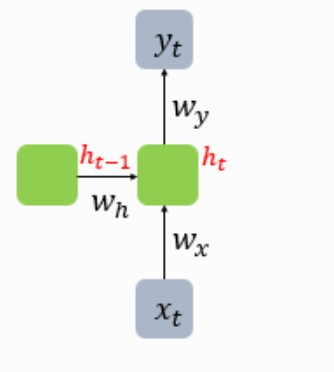

현재 시점 t에서의 은닉 상태값을 $h_t$라고 정의하겠습니다. 은닉층의 메모리 셀은 $h_t$를 계산하기 위해서 총 두 개의 가중치를 가집니다. 하나는 입력층을 위한 가중치  $W_x$이고, 하나는 이전 시점 t-1의 은닉 상태값인 $h_{t-1}$을 위한 가중치 $W_h$입니다.

이를 식으로 표현하면 다음과 같습니다.

* 은닉층 : $h_{t} = tanh(W_{x} x_{t} + W_{h}h_{t−1} + b)$
* 출력층 : $y_{t} = f(W_{y}h_{t} + b)$  
   단, $f$는 비선형 활성화 함수 중 하나.  
  

RNN의 은닉층 연산을 벡터와 행렬 연산으로 이해해봅시다. 자연어 처리에서 RNN의 입력 $x_t$는 대부분의 경우 단어 벡터로 간주할 수 있는데, 단어 벡터의 차원을 $d$
라고 하고, 은닉 상태의 크기를 $D_h$
라고 하였을 때 각 벡터와 행렬의 크기는 다음과 같습니다.  

$x_t$ : $(d × 1)$  
$W_{x}$ : $(D_{h} × d)$   
$W_{h}$ : $(D_{h} × D_{h})$  
$h_{t-1}$ : $(D_{h} × D_{h})$  
$b$ : $(D_{h} × 1)$

배치 크기가 1이고, $d$와 $D_h$ 두 값 모두를 4로 가정하였을 때, RNN의 은닉층 연산을 그림으로 표현하면 아래와 같습니다.

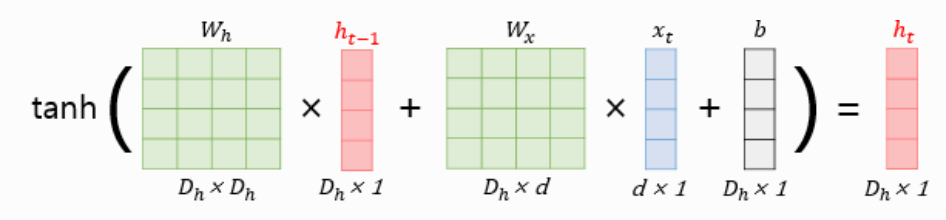

이때 $h_t$를 계산하기 위한 활성화 함수로는 주로 하이퍼볼릭탄젠트 함수(tanh)가 사용됩니다. 위의 식에서 각각의 가중치 $W_x$, $W_h$, $W_y$의 값은 하나의 층에서는 모든 시점에서 값을 동일하게 공유합니다. 하지만 은닉층이 2개 이상일 경우에는 각 은닉층에서의 가중치는 서로 다릅니다.

출력층은 결과값인 $y_t$를 계산하기 위한 활성화 함수로는 푸는 문제에 따라서 다를텐데, 예를 들어서 이진 분류를 해야하는 경우라면 출력층에 로지스틱 회귀를 사용하여 시그모이드 함수를 사용할 수 있고 다중 클래스 분류를 해야하는 경우라면 출력층에 소프트맥스 회귀를 사용하여로 소프트맥스 함수를 사용할 수 있습니다.

---
### **2. 케라스(Keras)로 RNN 구현하기**

케라스로 RNN 층을 추가하는 코드는 다음과 같습니다.
  
```python
    from tensorflow.keras.layers import SimpleRNN

    model.add(SimpleRNN(hidden_units))
```
인자를 사용할 때를 보겠습니다.

```python
    # 추가 인자를 사용할 때
    model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))

    # 다른 표기
    model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N))
```  
  
**hidden_units** = 은닉 상태의 크기를 정의. 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와도 동일. RNN의 용량(capacity)을 늘린다고 보면 되며, 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가진다.  
**timesteps** = 입력 시퀀스의 길이(input_length)라고 표현하기도 함. 시점의 수.  
**input_dim** = 입력의 크기.
  
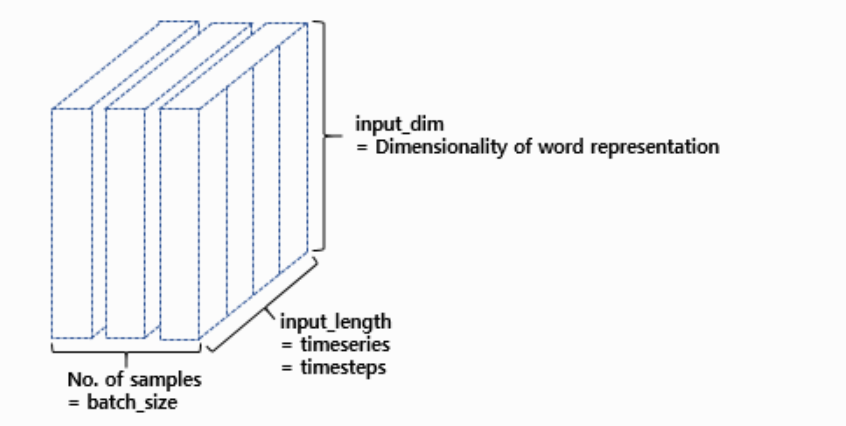

RNN 층은 (batch_size, timesteps, input_dim) 크기의 3D 텐서를 입력으로 받습니다. batch_size는 한 번에 학습하는 데이터의 개수를 말합니다. 여기서부터는 텐서의 개념을 반드시 이해해야 하므로 벡터와 행렬 연산 챕터의 텐서 설명을 참고하시기 바랍니다. 다만, 이러한 표현은 사람이나 문헌에 따라서, 또는 풀고자 하는 문제에 따라서 종종 다르게 기재되는데 의 그림은 문제와 상황에 따라서 다르게 표현되는 입력 3D 텐서의 대표적인 표현들을 보여줍니다.

주의할 점은 위 코드는 출력층까지 포함한 인공 신경망 코드가 아니라 주로 은닉층으로 간주할 수 있는 하나의 RNN 층에 대한 코드입니다. 해당 코드가 리턴하는 결과값은 하나의 은닉 상태 또는 정의하기에 따라 여러 개의 시점의 은닉 상태 입니다. 아래의 그림은 만약 전결합층(Fully-connected layer)을 출력층으로 사용하였을 경우의 인공 신경망 그림과 은닉층까지만 표현한 그림의 차이를 보여줍니다.  
  
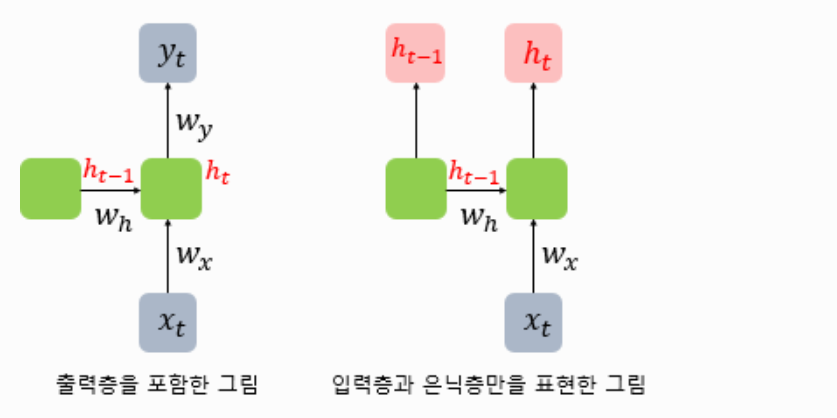

그렇다면 RNN 층은 위에서 설명한 입력 3D 텐서를 입력받아서 어떻게 은닉 상태를 출력할까요? RNN 층은 사용자의 설정에 따라 두 가지 종류의 출력을 내보냅니다. 메모리 셀의 최종 시점의 은닉 상태만을 리턴하고자 한다면 (batch_size, output_dim) 크기의 2D 텐서를 리턴합니다. 하지만, 메모리 셀의 각 시점(time step)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴하고자 한다면 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴합니다. 이는 RNN 층의 return_sequences 매개 변수에 True를 설정하여 설정이 가능합니다. output_dim은 앞서 코드에서 정의한 hidden_units의 값으로 설정됩니다.  

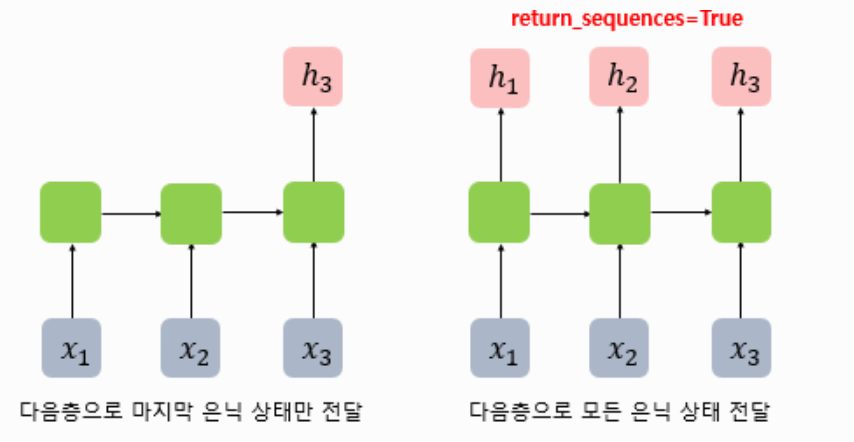

위의 그림은 `time step=3`일 때, `return_sequences = True`를 설정했을 때와 그렇지 않았을 때 어떤 차이가 있는지를 보여줍니다. `return_sequences=True`를 선택하면 메모리 셀이 모든 시점(time step)에 대해서 은닉 상태값을 출력하며, 별도 기재하지 않거나 `return_sequences=False`로 선택할 경우에는 메모리 셀은 하나의 은닉 상태값만을 출력합니다. 그리고 이 하나의 값은 마지막 시점(time step)의 메모리 셀의 은닉 상태값입니다.

마지막 은닉 상태만 전달하도록 하면 **다 대 일(many-to-one)** 문제를 풀 수 있고, 모든 시점의 은닉 상태를 전달하도록 하면, 다음층에 RNN 은닉층이 하나 더 있는 경우이거나 **다 대 다(many-to-many)** 문제를 풀 수 있습니다.

뒤에서 배우는 LSTM이나 GRU도 내부 메커니즘은 다르지만 `model.add()`를 통해서 층을 추가하는 코드는 SimpleRNN 코드와 같은 형태를 가집니다. 실습을 통해 모델 내부적으로 출력 결과를 어떻게 정의하는지 이해해봅시다.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2, 10)))  # 크기10의 단어벡터 2개(2개의 단어)로 이루어진 문장 입력
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

C:\Users\dlwlg\anaconda3\envs\py310_yolo\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 3)                   │              42 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

<파라미터 수>
* 입력 가중치 (W): 30개  (10(입력벡터크기) x 3 (Hidden 크기)) : input_dim x units
* 이전 상태 가중치 (U): 9개 (3(hidden) x 3(hidden)) , units x units
* 바이어스 (b): 3개      # unit 당 하나씩 bias 필요
*  총 파라미터 수: 42개

출력값이 (batch_size, output_dim) 크기의 2D 텐서일 때, output_dim은 hidden_units의 값인 3입니다. 이 경우 batch_size를 현 단계에서는 알 수 없으므로 (None, 3)이 됩니다. 

---
### **3. 파이썬으로 RNN 구현하기**

직접 Numpy로 RNN 층을 구현해보겠습니다. 앞서 메모리 셀에서 은닉 상태를 계산하는 식을 다음과 같이 정의하였습니다.  
  
$h_{t} = tanh(W_{x}X_{t} + W_{h}h_{t−1} + b)$
  
실제 구현에 앞서 간단히 가상의 코드(pseudocode)를 작성해보겠습니다.  
  
```python
    # 아래의 코드는 가상의 코드(pseudocode)로 실제 동작하는 코드가 아님.

    hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화
    for input_t in input_length: # 각 시점마다 입력을 받는다.
        output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
        hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.
```

우선 **t 시점의 은닉 상태** 를 `hidden_state_t`라는 변수로 선언하였고, **입력 데이터의 길이** 를 `input_length`로 선언하였습니다. 이 경우, 입력 데이터의 길이는 곧 총 시점의 수(timesteps)가 됩니다. 그리고 **t 시점의 입력값** 을 `input_t`로 선언하였습니다. 각 메모리 셀은 각 시점마다 input_t와 hidden_sate_t(이전 상태의 은닉 상태)를 입력으로 활성화 함수인 하이퍼볼릭탄젠트 함수를 통해 현 시점의 hidden_state_t를 계산합니다.

가상의 코드를 통해 간단히 개념 정립을 해보았습니다. RNN 층을 실제 동작되는 코드로 구현해보겠습니다. 아래의 코드는 이해를 돕기 위해 (timesteps, input_dim) 크기의 2D 텐서를 입력으로 받았다고 가정하였으나, 실제로 케라스에서는 (batch_size, timesteps, input_dim)의 크기의 3D 텐서를 입력으로 받는 것을 기억합시다.

timesteps는 시점의 수입니다. 자연어 처리에서는 보통 문장의 길이입니다. input_dim은 입력의 차원입니다. 자연어 처리에서는 보통 단어 벡터의 차원입니다. hidden_units는 은닉 상태의 크기로 메모리 셀의 용량입니다. 초기 은닉 상태는 0의 값을 가지는 벡터로 초기화합니다. 초기 은닉 상태를 출력해보겠습니다

In [2]:
import numpy as np

timesteps = 10   # 10개의 단어가 순차적으로 입력됨 (W 결정에 역할 없음)
input_dim = 4    # 단어 벡터의 크기
hidden_units = 8 # 임의로 결정하는 값

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))     # (10, 4)

# 초기 은닉 상태는 0(벡터)로 초기화 
hidden_state_t = np.zeros((hidden_units,))  # (8, ) : 0 이 8개로 초기화

print('초기 은닉 상태 :', hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


은닉 상태의 크기를 8로 정의하였으므로 8의 차원을 가지는 0의 값으로 구성된 벡터가 출력됩니다. 가중치와 편향을 각 크기에 맞게 정의하고 크기를 출력해보겠습니다.

In [3]:
Wx = np.random.random((hidden_units, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


각 가중치와 편향의 크기는 다음과 같습니다. $W_x$는 (은닉 상태의 크기 × 입력의 차원), $W_h$는 (은닉 상태의 크기 × 은닉 상태의 크기), $b$는 (은닉 상태의 크기)의 크기를 가집니다. 이제 모든 시점의 은닉 상태를 출력한다고 가정하고, RNN 층을 동작시켜봅시다.

In [4]:
inputs.shape, inputs  ## 크기 4인 단어벡터 10개의 sequence

((10, 4),
 array([[0.32707379, 0.68471942, 0.36766583, 0.30227069],
        [0.07508244, 0.41730226, 0.88118706, 0.75738374],
        [0.82960172, 0.47318125, 0.22374022, 0.70600008],
        [0.06490613, 0.6014189 , 0.73364912, 0.6309458 ],
        [0.97223379, 0.58688958, 0.14648482, 0.05445927],
        [0.26415773, 0.14760585, 0.53909615, 0.32002894],
        [0.55265646, 0.24677521, 0.56470806, 0.27587761],
        [0.52545267, 0.65343369, 0.1900429 , 0.96018096],
        [0.95648366, 0.59913467, 0.16939704, 0.71228572],
        [0.11946223, 0.85521789, 0.77966437, 0.53378737]]))

In [5]:
total_hidden_states = []

# 각 시점 별 입력값.  ( 단어벡터 하나씩 입력 : 10개 단어 )
for input_t in inputs:

  # Ht+1 shape (8, ) : Wx * Xt + Wh * Ht-1 + b(bias) 
  output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)

  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
  # 각 시점의 은닉 상태의 값을 계속해서 누적
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t  # 다음 시점의 입력으로 활용

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0)

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')

total_hidden_states.shape, total_hidden_states

모든 시점의 은닉 상태 :


((10, 8),
 array([[0.72971961, 0.96387163, 0.88367148, 0.64712897, 0.86486884,
         0.86407658, 0.8734708 , 0.87702269],
        [0.99978187, 0.99996988, 0.99983692, 0.99845283, 0.9999669 ,
         0.99984886, 0.99982661, 0.99994697],
        [0.99996267, 0.99999409, 0.99997138, 0.99974599, 0.9999796 ,
         0.99996722, 0.99998638, 0.99996187],
        [0.99993898, 0.99999175, 0.99994679, 0.99948593, 0.99998935,
         0.99994217, 0.99995875, 0.99997728],
        [0.99994672, 0.99999169, 0.99995701, 0.99970791, 0.99994389,
         0.99996096, 0.99998312, 0.99988136],
        [0.99990592, 0.99997365, 0.99984983, 0.99930244, 0.99997129,
         0.99992783, 0.99992454, 0.99991924],
        [0.9999434 , 0.999987  , 0.99992642, 0.99952551, 0.99997376,
         0.99995982, 0.99995805, 0.99993436],
        [0.99995274, 0.99999409, 0.99997059, 0.99972036, 0.99998574,
         0.99994821, 0.99998588, 0.99997532],
        [0.99996927, 0.99999597, 0.99998069, 0.99979706, 0.9999799 ,
 

---
### **4. 깊은 순환 신경망(Deep Recurrent Neural Network)**


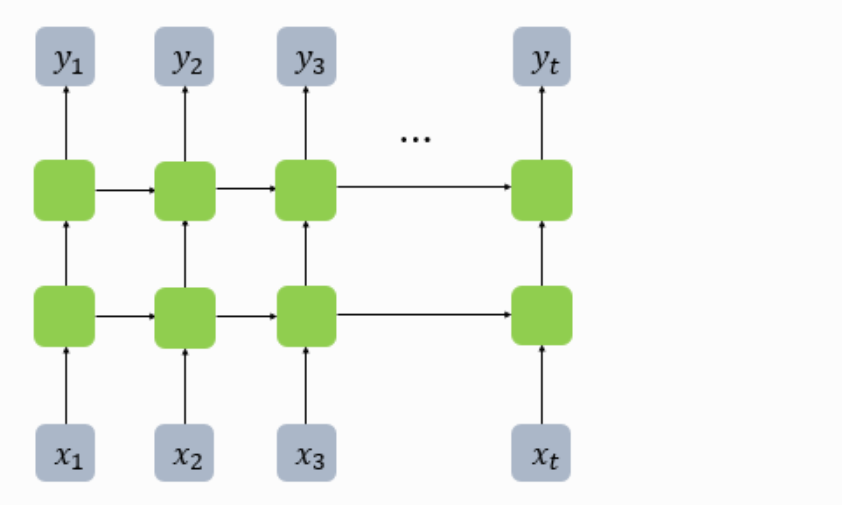

앞서 RNN도 다수의 은닉층을 가질 수 있다고 언급한 바 있습니다. 위의 그림은 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 순환 신경망의 모습을 보여줍니다. 은닉층을 2개 추가하는 경우 코드는 아래와 같습니다.

In [6]:
hidden_units

8

In [7]:
model = Sequential()
# model.add(SimpleRNN(hidden_units, input_length=10, input_dim=5, return_sequences=True))
model.add(SimpleRNN(hidden_units, input_shape=(10, 5), return_sequences=True))
model.add(SimpleRNN(hidden_units, return_sequences=True))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 10, 8)               │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 10, 8)               │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248 (992.00 B)

 Trainable params: 248 (992.00 B)

 Non-trainable params: 0 (0.00 B)

위의 코드에서 첫번째 은닉층은 다음 은닉층이 존재하므로 return_sequences = True를 설정하여 모든 시점에 대해서 은닉 상태 값을 다음 은닉층으로 보내주고 있습니다.

---
### **5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)**

양방향 순환 신경망은 시점 t에서의 출력값을 예측할 때 이전 시점의 입력뿐만 아니라, 이후 시점의 입력 또한 예측에 기여할 수 있다는 아이디어에 기반합니다. 빈칸 채우기 문제에 비유하여 보겠습니다.

```text
    운동을 열심히 하는 것은 [      ]을 늘리는데 효과적이다.

    1) 근육
    2) 지방
    3) 스트레스
```  
  
'운동을 열심히 하는 것은 [ ]을 늘리는데 효과적이다.' 라는 문장에서 문맥 상으로 정답은 '근육'입니다. 위의 빈 칸 채우기 문제를 풀 때 이전에 나온 단어들만으로 빈 칸을 채우려고 시도해보면 정보가 부족합니다. '운동을 열심히 하는 것은' 까지만 주고 뒤의 단어들은 가린 채 빈 칸의 정답이 될 수 있는 세 개의 선택지 중 고르는 것은 뒤의 단어들까지 알고있는 상태보다 명백히 정답을 결정하기가 어렵습니다.

RNN이 풀고자 하는 문제 중에서는 과거 시점의 입력 뿐만 아니라 미래 시점의 입력에 힌트가 있는 경우도 많습니다. 그래서 이전과 이후의 시점 모두를 고려해서 현재 시점의 예측을 더욱 정확하게 할 수 있도록 고안된 것이 양방향 RNN입니다.

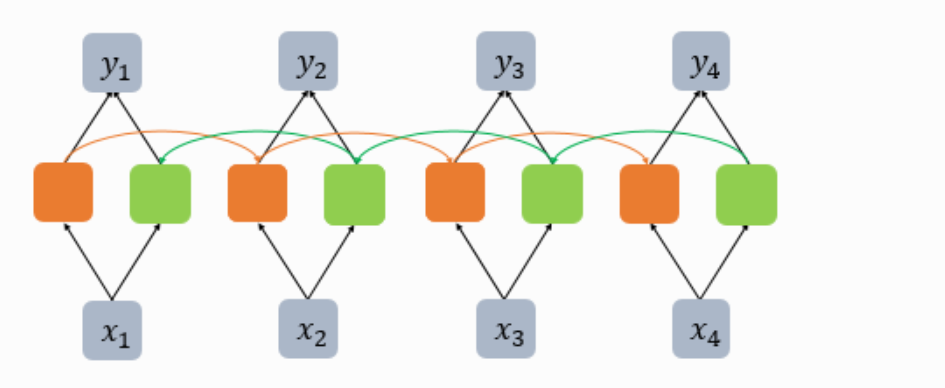

양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다. 첫번째 메모리 셀은 앞에서 배운 것처럼 **앞 시점의 은닉 상태(Forward States)** 를 전달받아 현재의 은닉 상태를 계산합니다. 위의 그림에서는 주황색 메모리 셀에 해당됩니다. 두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 앞 시점의 은닉 상태가 아니라 **뒤 시점의 은닉 상태(Backward States)** 를 전달 받아 현재의 은닉 상태를 계산합니다. 입력 시퀀스를 반대 방향으로 읽는 것입니다. 위의 그림에서는 초록색 메모리 셀에 해당됩니다. 그리고 이 두 개의 값 모두가 현재 시점의 출력층에서 출력값을 예측하기 위해 사용됩니다.

In [8]:
from tensorflow.keras.layers import Bidirectional, SimpleRNN
hidden_units = 8
timesteps = 10
input_dim = 5

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), 
                        input_shape=(timesteps, input_dim)))
model.summary()

C:\Users\dlwlg\anaconda3\envs\py310_yolo\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 10, 16)              │             224 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224 (896.00 B)

 Trainable params: 224 (896.00 B)

 Non-trainable params: 0 (0.00 B)

**양방향 RNN도 다수의 은닉층** 을 가질 수 있습니다. 아래의 그림은 양방향 순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 양방향 순환 신경망의 모습을 보여줍니다.  
  
 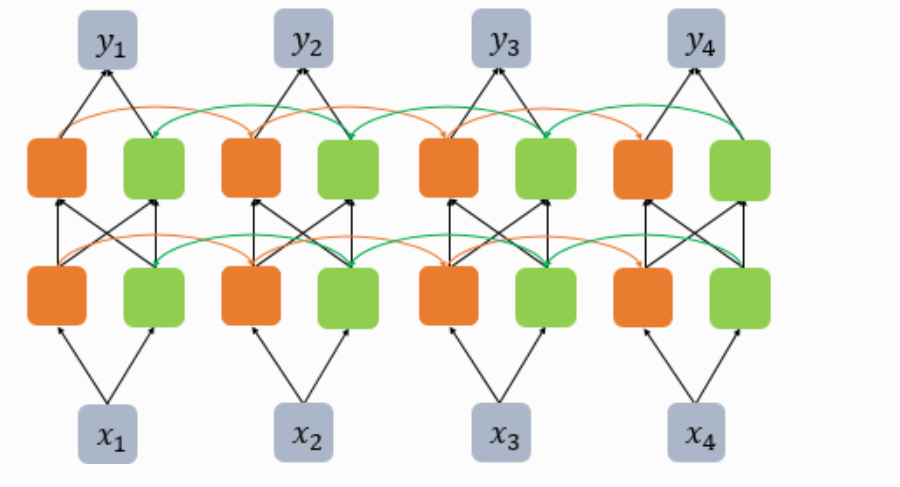

다른 인공 신경망 모델들도 마찬가지이지만, 은닉층을 무조건 추가한다고 해서 모델의 성능이 좋아지는 것은 아닙니다. 은닉층을 추가하면 학습할 수 있는 양이 많아지지만 반대로 훈련 데이터 또한 많은 양이 필요합니다. 아래의 코드는 은닉층이 4개인 경우를 보여줍니다.

In [9]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_units, return_sequences=True)))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional)      │ (None, 10, 16)              │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 10, 16)              │             400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 624 (2.44 KB)

 Trainable params: 624 (2.44 KB)

 Non-trainable params: 0 (0.00 B)

양방향 RNN은 태깅 작업 챕터의 실습에서 사용해보겠습니다.

---
### **6. 점검 퀴즈**

RNN을 제대로 이해했는지 퀴즈를 통해서 확인해보세요! 모델에 대한 설명이 다음과 같을 때, 총 파라미터 개수를 구해보세요.

Embedding을 사용하며, 단어 집합(Vocabulary)의 크기가 5,000이고 임베딩 벡터의 차원은 100입니다.
은닉층에서는 Simple RNN을 사용하며, 은닉 상태의 크기는 128입니다.
훈련에 사용하는 모든 샘플의 길이는 30으로 가정합니다.
이진 분류를 수행하는 모델로, 출력층의 뉴런은 1개로 시그모이드 함수를 사용합니다.
은닉층은 1개입니다.
정답은 위키독스 웹 사이트의 댓글에 남겨두었습니다.

마지막 편집일시 : 2022년 11월 14일 2:54 오후

Embedding = 5,000(input) * 100(embedding) = 500,000  
Wx = 100(embedding) * 128(hidden) = 12,800  
Wh = 128 * 128 = 16,384  
bias(hidden)  = 128  
Wy = 128  
bias(output) = 1  
  
total = 529,441